In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
     

In [47]:
df = pd.read_csv('final2.csv')

In [48]:
df.head()

,Sno,Humidity,Light,CO2,HumidityRatio,Occupancy,target
0,1,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,3,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,4,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,5,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [50]:
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9752 entries, 0 to 9751
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sno            9752 non-null   int64  
 1   Humidity       9752 non-null   float64
 2   Light          9752 non-null   float64
 3   CO2            9752 non-null   float64
 4   HumidityRatio  9752 non-null   float64
 5   Occupancy      9752 non-null   float64
 6   target         9752 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 533.4 KB


In [51]:
df.isnull().sum()

Sno              0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
target           0
dtype: int64

In [52]:
for feature in df.columns:
    if df[feature].isnull().sum() > 0:
        print("In {}, mean of null value is : {}".format(feature, (df[feature].isnull().sum() / len(df)) * 100 ))

In [53]:

df

,Sno,Humidity,Light,CO2,HumidityRatio,Occupancy,target
0,1,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,3,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,4,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,5,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...,...
9747,9748,20.8150,27.717500,429.750000,1505.250000,0.004213,1
9748,9749,20.8650,27.745000,423.500000,1514.500000,0.004230,1
9749,9750,20.8900,27.745000,423.500000,1521.500000,0.004237,1
9750,9751,20.8900,28.022500,418.750000,1632.000000,0.004279,1


In [54]:
X = df.iloc[:,0:-1]
y = df['target']


In [55]:
X.head()

,Sno,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,21.7600,31.133333,437.333333,1029.666667,0.005021
1,2,21.7900,31.000000,437.333333,1000.000000,0.005009
2,3,21.7675,31.122500,434.000000,1003.750000,0.005022
3,4,21.7675,31.122500,439.000000,1009.500000,0.005022
4,5,21.7900,31.133333,437.333333,1005.666667,0.005030


In [56]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [57]:
samples

[(       Sno   Humidity      Light    CO2  HumidityRatio  Occupancy
  5167  5168  20.100000  32.290000    0.0     568.500000   0.004700
  2811  2812  23.767500  25.675000  654.0     547.000000   0.004674
  9228  9229  20.823333  28.823333    0.0    1158.000000   0.004385
  1329  1330  24.340000  23.500000  223.0     805.000000   0.004426
  9337  9338  20.700000  26.890000    0.0    1224.000000   0.004057
  ...    ...        ...        ...    ...            ...        ...
  7891  7892  19.890000  30.390000    0.0     723.000000   0.004364
  9225  9226  20.890000  28.840000    0.0    1154.000000   0.004405
  4859  4860  20.050000  35.700000    0.0     540.000000   0.005184
  3264  3265  20.390000  31.200000    0.0     516.333333   0.004623
  2732  2733  23.890000  25.200000  775.0     647.333333   0.004621
  
  [6826 rows x 6 columns],
         Sno  Humidity      Light    CO2  HumidityRatio  Occupancy
  2662  2663    23.600  25.356667  785.0     701.333333   0.004569
  1768  1769    21.2

In [58]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [59]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [60]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.57 Best Kernel =  poly Best Nu =  3.37 Best Epsilon =  4.79
Best Accuracy =  0.86 Best Kernel =  linear Best Nu =  5.09 Best Epsilon =  7.15
Best Accuracy =  0.82 Best Kernel =  rbf Best Nu =  2.55 Best Epsilon =  8.86
Best Accuracy =  0.78 Best Kernel =  sigmoid Best Nu =  2.78 Best Epsilon =  8.5
Best Accuracy =  0.94 Best Kernel =  linear Best Nu =  0.43 Best Epsilon =  0.68
Best Accuracy =  0.92 Best Kernel =  rbf Best Nu =  6.81 Best Epsilon =  0.46
Best Accuracy =  0.46 Best Kernel =  poly Best Nu =  5.98 Best Epsilon =  0.38
Best Accuracy =  0.58 Best Kernel =  poly Best Nu =  6.95 Best Epsilon =  5.38
Best Accuracy =  0.83 Best Kernel =  rbf Best Nu =  2.42 Best Epsilon =  5.35
Best Accuracy =  0.83 Best Kernel =  poly Best Nu =  2.17 Best Epsilon =  9.78


In [61]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.57,poly,3.37,4.79
1,2,0.86,linear,5.09,7.15
2,3,0.82,rbf,2.55,8.86
3,4,0.78,sigmoid,2.78,8.50
4,5,0.94,linear,0.43,0.68
5,6,0.92,rbf,6.81,0.46
6,7,0.46,poly,5.98,0.38
7,8,0.58,poly,6.95,5.38
8,9,0.83,rbf,2.42,5.35
9,10,0.83,poly,2.17,9.78


In [62]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [63]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [64]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)  

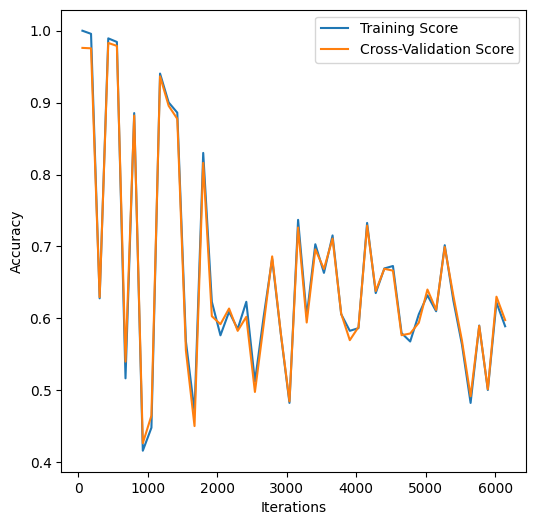

In [65]:
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()